<a href="https://colab.research.google.com/github/MONISHA2876/ML-Begineer-Level-Projects/blob/main/HeartDiseasePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HEART DISEASE PREDICTOR**

Data set from kaggle

using logistic regression model for this purpose

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download

In [15]:
#importing all dependancies here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**DATA COLLECTION**

In [32]:
data_raw = pd.read_csv('/content/drive/MyDrive/ML Models DataSet/heart.csv')

AGE in YEARS

SEX: 1 MALE, 0 FEMALE

CP: CHEST PAIN TYPE (1-3)

TRESTBPS: REST BLOOD PRESSURE

CHOL: CHOLESTORAL MG/DL

FBS: FASTING BLOOD SUGAR > 120 MG/DL (0 FALSE, 1 TRUE)

RESTECG: RESTING ELECTROCARDIOGRAPHIC RESULT (1-3)

THATLACH: MAX HEART RATE ACHIEVED

EXANG: EXERCISE INDUCED ANGINA (1 YES, 0 NO)

OLDPEAK

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
data_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**DATA ANALYSIS**

In [28]:
data_raw.shape

(1025, 13)

In [33]:
print(data_raw.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [35]:
data_raw.value_counts('target')

,count
target,
1,526
0,499


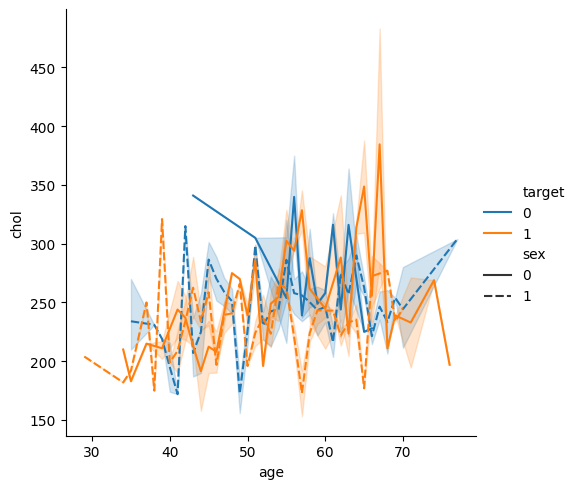

In [34]:
sns.relplot(data=data_raw, x='age', y='chol', hue='target',style='sex', kind='line', weights='thal')

In [13]:
print(data_raw.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [19]:
data_raw.isnull().sum().sum()

np.int64(0)

**DATA PRE PROCESSING**

In [36]:
# Remove target from raw data

Y = data_raw[['target']]
X = data_raw.drop('target', axis=1)

print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [41]:
#we have to standardise the data

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [42]:
print(X)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


In [44]:
#Split data in training and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9,random_state=2,stratify=Y)

print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (922, 13) (103, 13)


**MODEL TRAINING**

In [45]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**TESTING MODEL**

In [47]:
accuracy_on_training_data = accuracy_score(model.predict(X_train),Y_train)
print(accuracy_on_training_data)

0.8557483731019523


In [48]:
accuracy_on_testing_data = accuracy_score(model.predict(X_test),Y_test)
print(accuracy_on_testing_data)

0.7961165048543689


**MAKING A PREDICTION SYSTEM**

In [52]:
input = (44,1,2,130,233,0,1,179,1,0.4,2,0,2)

input_data = np.array(input)
input_data = input_data.reshape(1,-1)
input_data = scaler.fit_transform(input_data)

result = model.predict(input_data)

if result[0] == 0:
  print('Person does not have heart disease')
else:
  print('Person has heart disease')

Person does not have heart disease
